In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [99]:
df = pd.read_csv("gurgaon_properties_feature_engineered_cleaned.csv")

In [100]:
df.shape

(3788, 23)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3787 non-null   object 
 1   society              3786 non-null   object 
 2   sector               3788 non-null   object 
 3   price                3769 non-null   float64
 4   Price_per_sqft       3769 non-null   float64
 5   area                 3769 non-null   float64
 6   areaWithType         3787 non-null   object 
 7   bedRoom              3787 non-null   float64
 8   bathroom             3787 non-null   float64
 9   balcony              3787 non-null   object 
 10  floorNum             3768 non-null   float64
 11  facing               2690 non-null   object 
 12  agePossession        3788 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1719 non-null   float64
 15  carpet_area          1941 non-null   f

In [102]:
df.duplicated().sum()

126

In [103]:
df = df.drop_duplicates()

In [104]:
df.shape

(3662, 23)

In [105]:
from skimpy import skim

In [106]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3662   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 23     │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 7     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA    ┃ NA %   ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50  ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ price                  │    18 │   0.49 │    2.5 │      3 │  0.07 │  0.95 │  1.5 │   2.8 │     32 │   ▇▁   │  │
│ │ Price_per_sqft         │    18 │   0.49 │  14000 │  23000 │     4 │  6800 │ 9000 │ 14000 │ 600000 │   ▇    │  │
│ │ area                   │    18 │   0.49 │   2900 │  23000 │    50 │  1200 │ 1700 │  2300 │ 880000 │   ▇    │  │
│ │ bedRoom                │     1 │   0.03 │    3.3 │    1.9 │     1 │     2 │    3 │     4 │     21 │   ▇▁   │  │
│ │ bathroom               │     1 │   0.03 │    3.4 │    1.9 │     1 │     2 │    3 │     4 │     21 │   ▇▁   │  │
│ │ floorNum               │    20 │   0.55 │    6.8 │      6 │     0 │     2 │    5 │    10 │     51 │  ▇▃▁   │  │
│ │ super_built_up_area    │  1787 │   48.8 │   1900 │    760 │    89 │  1500 │ 1800 │  2200 │  10000 │   ▆▇   │  │
│ │ built_up_area          │  1986 │  54.23 │   2400 │  18000 │     2 │  1100 │ 1600 │  2400 │ 740000 │   ▇    │  │
│ │ carpet_area            │  1793 │  48.96 │   2500 │  23000 │    15 │   840 │ 1300 │  1800 │ 610000 │   ▇    │  │
│ │ store room             │     0 │      0 │  0.092 │   0.29 │     0 │     0 │    0 │     0 │      1 │ ▇    ▁ │  │
│ │ study room             │     0 │      0 │   0.19 │   0.39 │     0 │     0 │    0 │     0 │      1 │ ▇    ▂ │  │
│ │ servant room           │     0 │      0 │   0.36 │   0.48 │     0 │     0 │    0 │     1 │      1 │ ▇    ▅ │  │
│ │ pooja room             │     0 │      0 │   0.18 │   0.38 │     0 │     0 │    0 │     0 │      1 │ ▇    ▂ │  │
│ │ others                 │     0 │      0 │   0.11 │   0.31 │     0 │     0 │    0 │     0 │      1 │ ▇    ▁ │  │
│ │ furnishing_type        │     0 │      0 │    0.4 │   0.59 │     0 │     0 │    0 │     1 │      2 │ ▇  ▃ ▁ │  │
│ │ luxury_score           │     0 │      0 │     72 │     53 │     0 │    31 │   59 │   110 │    170 │ ▇▇▅▃▃▅ │  │
│ └────────────────────────┴───────┴────────┴────────┴────────┴───────┴───────┴──────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA         ┃ NA %        ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ property_type              │          1 │        0.0

In [107]:
df.head(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip ivory,sector 70,5.0,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,...,NaN,NaN,4800.00,0,1,1,0,0,0,119
1,flat,signature global the millennia,sector 37d,0.6,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,3,...,650.0,NaN,596.12,0,0,0,0,0,0,35


([<matplotlib.patches.Wedge at 0x1c2fceea510>,
 [Text(-0.824516365903283, 0.7281296329347156, 'flat'),
  Text(0.8245163659032829, -0.7281296329347157, 'house')],
 [Text(-0.4497361995836089, 0.39716161796439026, '77.0%'),
  Text(0.44973619958360883, -0.39716161796439037, '23.0%')])

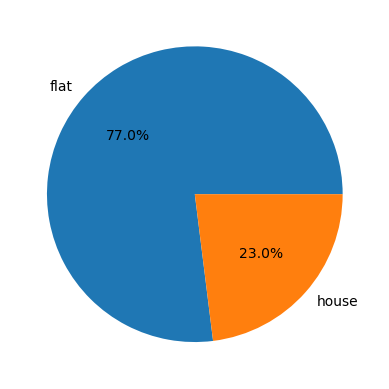

In [109]:
plt.pie(df["property_type"].value_counts(), labels=df["property_type"].value_counts().index, autopct='%1.1f%%', )

In [110]:
df.sample(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
1556,house,independent,sector 25,10.85,38150.0,2844.0,Plot area 316(264.22 sq.m.),6.0,6.0,1,...,NaN,2844.0,NaN,1,0,0,0,0,1,136
3654,house,independent,sector 4,2.30,17014.0,1352.0,Plot area 160(133.78 sq.m.),4.0,4.0,3,...,NaN,160.0,NaN,0,0,0,0,0,1,15


In [ ]:
#Dealing with Society column

In [111]:
df["society"].value_counts().shape

(676,)

In [112]:
df["society"].value_counts()

society
independent                             473
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
spectrum centre                           1
m3m golf hills                            1
sonata group housing gh 24                1
ansal florence super                      1
aardhya homesh                            1
Name: count, Length: 676, dtype: int64

In [113]:
df[df["society"]!= "independent"]["society"].value_counts(normalize = True).cumsum().head(80)

society
tulip violet                            0.023533
ss the leaf                             0.046439
shapoorji pallonji joyville gurugram    0.059617
dlf new town heights                    0.072796
signature global park                   0.083778
                                          ...   
unitech uniworld resorts                0.510198
ireo the corridors                      0.513963
tarc maceo                              0.517414
adani m2k oyster grande                 0.520866
breez global heights                    0.524318
Name: proportion, Length: 80, dtype: float64

In [114]:
society_counts = df["society"].value_counts()
society_counts


society
independent                             473
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
spectrum centre                           1
m3m golf hills                            1
sonata group housing gh 24                1
ansal florence super                      1
aardhya homesh                            1
Name: count, Length: 676, dtype: int64

In [115]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 271,
 'Very Low (1)': 310}

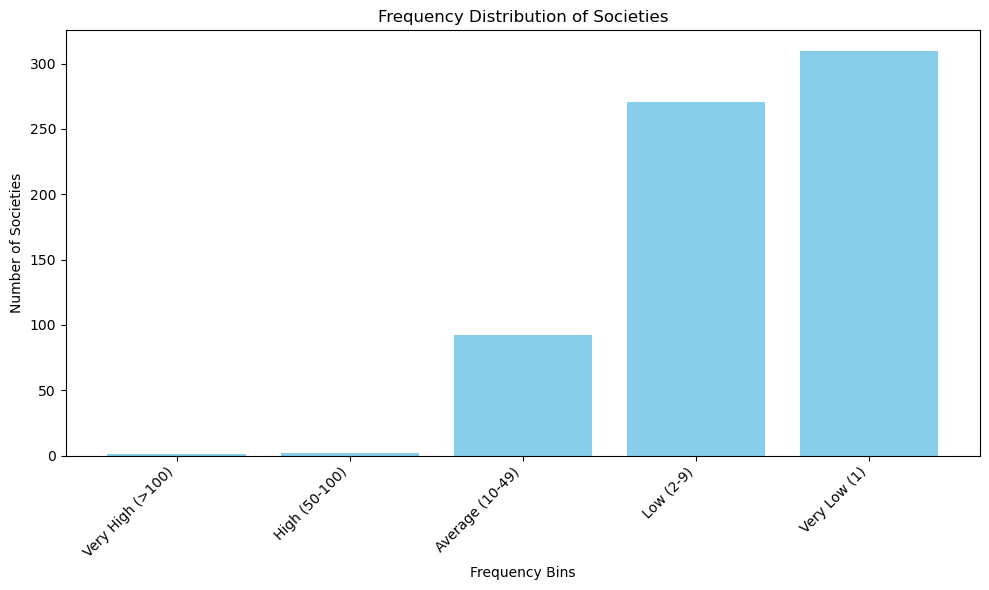

In [116]:
import matplotlib.pyplot as plt

# Define the frequency bins
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

# Extract bin names and frequencies
bins = list(frequency_bins.keys())
frequencies = list(frequency_bins.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bins, frequencies, color='skyblue')
plt.xlabel('Frequency Bins')
plt.ylabel('Number of Societies')
plt.title('Frequency Distribution of Societies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Axes: xlabel='society'>

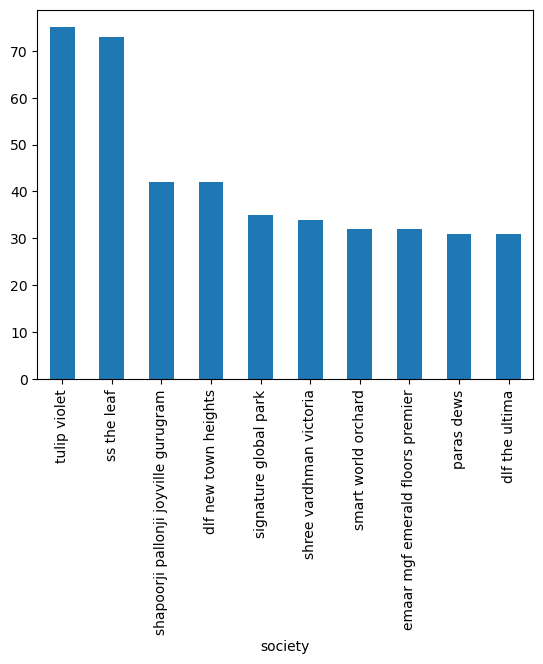

In [117]:
df[df["society"]!= "independent"]["society"].value_counts().head(10).plot(kind = "bar")

In [118]:
df[df["society"].isnull()]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
2856,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2.0,2.0,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0
3787,NaN,NaN,sector 76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
Dealing wiht sector column 

SOCIETY COLUMN EDA OUTCOMES #

1. From the provided data, it seems that the "society" column contains categorical information about various housing societies. Here's a summary of observations and exploratory data analysis (EDA) results for the "society" column:

Unique Societies: There are a total of 676 unique societies listed in the dataset.

2. Frequency Distribution: The frequency distribution of societies shows that:

There is 1 society with a very high count (>100).
There are 2 societies with a high count (50-100).
There are 92 societies with an average count (10-49).
There are 271 societies with a low count (2-9).
There are 310 societies with a very low count (1).
Top 10 Societies (Excluding "independent"): Among the societies with counts excluding "independent", the top 10 societies are:

tulip violet
ss the leaf
shapoorji pallonji joyville gurugram
dlf new town heights
signature global park
supertech ecovillage ii
central park flower valley cerise suites
ecosphere
tulip purple
shapoorji pallonji joyville

3. Missing Values: There are some missing values in the "society" column. For example, rows 2856 and 3787 have NaN values in the "society" column.

4. Visualization: The bar plot of the top 10 societies (excluding "independent") has been generated, showing the frequency of these societies.

Overall, the "society" column contains valuable information about different housing societies, their frequencies, and their distribution in the dataset. Further analysis could include exploring relationships between societies and other features in the dataset, such as price, location (sector), and property type.


In [119]:
df["sector"].value_counts().shape

(114,)

In [120]:
df["sector"].isnull().sum()

0

<Axes: xlabel='sector'>

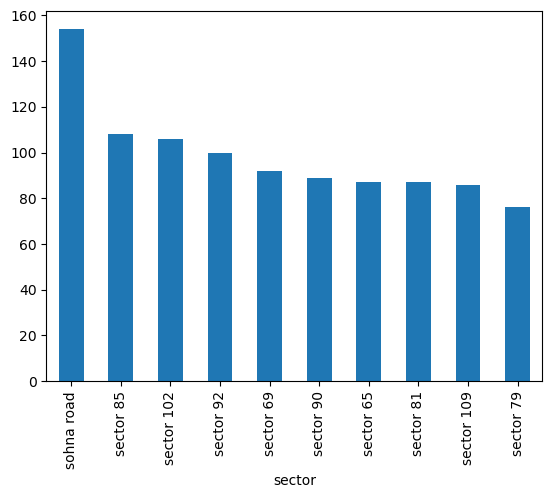

In [121]:
df["sector"].value_counts().head(10).plot(kind = "bar")

In [122]:
sector_counts = df['sector'].value_counts()

# Frequency distribution for sectors
sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}
sector_frequency_bins


{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 62,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

SECTOR COLUMN EDA RESULTS 
1. Unique Sectors: There are 114 unique sectors listed in the dataset.

2. Missing Values: There are no missing values in the "sector" column as indicated by the absence of null values.

3. Top 10 Sectors: The bar plot shows the frequency distribution of the top 10 sectors in the dataset.

4. Frequency Distribution of Sectors: Based on the frequency distribution bins:

There are 3 sectors with a very high count (>100).
There are 25 sectors with a high count (50-100).
There are 62 sectors with an average count (10-49).
There are 23 sectors with a low count (2-9).
There is 1 sector with a very low count (1).

These observations provide insights into the distribution of sectors within the dataset, with a range of frequencies from very low to very high. Further analysis could explore relationships between sectors and other features in the dataset, such as property prices or types of properties.

In [123]:
df.head(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip ivory,sector 70,5.0,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,...,NaN,NaN,4800.00,0,1,1,0,0,0,119
1,flat,signature global the millennia,sector 37d,0.6,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,3,...,650.0,NaN,596.12,0,0,0,0,0,0,35


In [ ]:
#Dealing with price column

In [125]:
df["price"].isnull().sum()

18

In [126]:
df["price"].describe()

count    3644.000000
mean        2.531265
std         2.979243
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

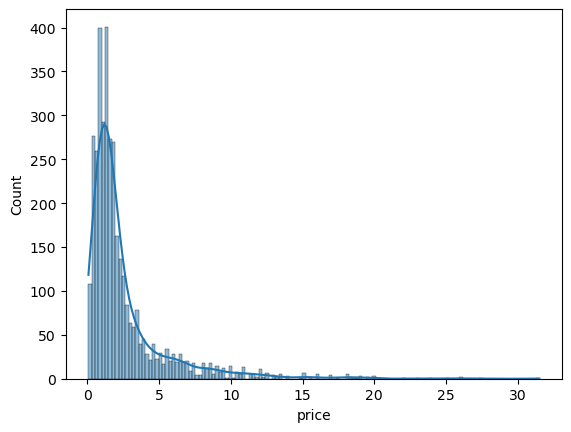

In [129]:
sns.histplot(df["price"], kde = True)

<Axes: >

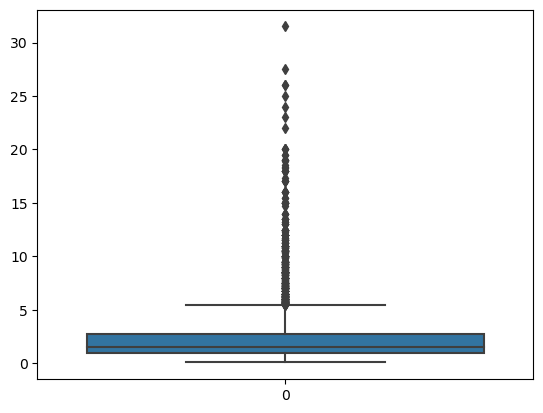

In [130]:
sns.boxplot(df["price"], )

In [131]:
import numpy as np

# Calculate IQR
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

# Calculate range
data_min = df["price"].min()
data_max = df["price"].max()
data_range = data_max - data_min

print("Interquartile Range (IQR):", IQR)
print("Range:", data_range)


Interquartile Range (IQR): 1.8
Range: 31.43


Observations:

1. There are 18 missing values in the "price" column, which need to be addressed before any analysis.
2. The descriptive statistics of the "price" column indicate that there is quite a wide range of prices, with a minimum of 0.07 and a maximum of 31.5. The mean price is around 2.53, with a median (50th percentile) of 1.52, suggesting a right-skewed distribution.
3. The histogram and box plot show the distribution of prices. The histogram indicates that most prices are concentrated towards the lower end, with a long tail towards higher prices, confirming the right-skewed distribution observed in the descriptive statistics. The box plot further visualizes the central tendency and spread of the prices, showing any potential outliers and the overall distribution.
4. The Interquartile Range (IQR) for the prices is 1.8, indicating the spread of the middle 50% of the data.
5. The Range of prices is 31.43, representing the difference between the maximum and minimum values of the dataset.

In [135]:
skew = df["price"].skew()
kurtosis = df["price"].kurt()
print(skew, kurtosis )

3.2863750273916024 15.004474319923384


1. The skewness of the "price" column is approximately 3.286, indicating a significant right-skewed distribution. This suggests that the majority of property prices are concentrated towards the lower end, with a long tail towards higher prices.

2. The kurtosis of the "price" column is approximately 15.004, indicating heavy tails and a sharp peak in the distribution. This suggests that there are potential outliers in the dataset, contributing to the heavy-tailed distribution.

In [138]:
# identifying outliers 

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -1.7500000000000002
Upper Bound: 5.45


In [149]:
outliers = df[(df["price"]<lower_bound)| (df["price"]>upper_bound)]

In [150]:
outliers.shape

(423, 23)

In [153]:
outliers["price"].describe()

count    423.000000
mean       9.232009
std        4.067408
min        5.460000
25%        6.450000
50%        8.000000
75%       10.655000
max       31.500000
Name: price, dtype: float64

1. Tukey's method was used to identify outliers in the "price" column.
2. The upper bound for potential outliers was calculated to be approximately 5.45, and the lower bound was adjusted to 0 for practicality.
3. A total of 423 potential outliers were identified in the dataset, with prices either below the lower bound or above the upper bound.
4. The mean price of the identified outliers is approximately 9.23, with a standard deviation of around 4.07. The prices range from 5.46 to 31.50.

price_bin
0-1       997
1-2      1311
2-3       504
3-5       364
5-10      340
10-20     117
20-50      11
Name: count, dtype: int64

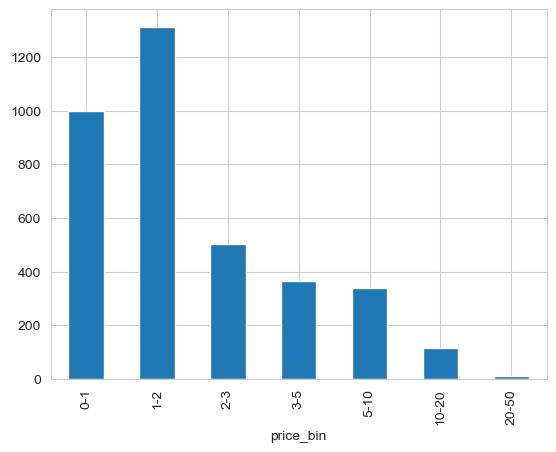

In [174]:
# BINNING 
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bin edges and labels
bin_edges = [0, 1, 2, 3, 5, 10, 20, 50]  # Adjust the bin edges as needed
bin_labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50']  # Adjust the bin labels as needed

# Create a new column with the bin labels
df['price_bin'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels, right=False)


df['price_bin'].value_counts().sort_index().plot(kind = "bar")

df['price_bin'].value_counts().sort_index()



In [175]:
df['price_bin']

0       5-10
1        0-1
2        1-2
3       5-10
4        1-2
        ... 
3783     1-2
3784     0-1
3785     1-2
3786     2-3
3787     NaN
Name: price_bin, Length: 3662, dtype: category
Categories (7, object): ['0-1' < '1-2' < '2-3' < '3-5' < '5-10' < '10-20' < '20-50']

In [178]:
df["price"].quantile(0.90)
# 90% of the properties have prices less than or equal to 5.9 crores. 

5.9

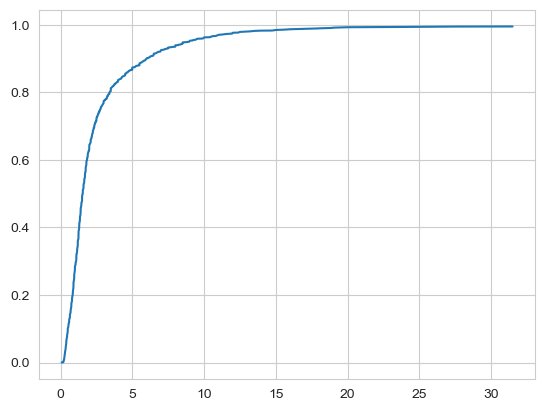

In [191]:
ecdf =  df["price"].value_counts().sort_index().cumsum()/len(df["price"])
plt.plot(ecdf.index, ecdf)

price
0.07     0.000273
0.16     0.000546
0.17     0.000819
0.19     0.001092
0.20     0.003277
           ...   
24.00    0.993719
25.00    0.993992
26.00    0.994539
27.50    0.994812
31.50    0.995085
Name: count, Length: 472, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

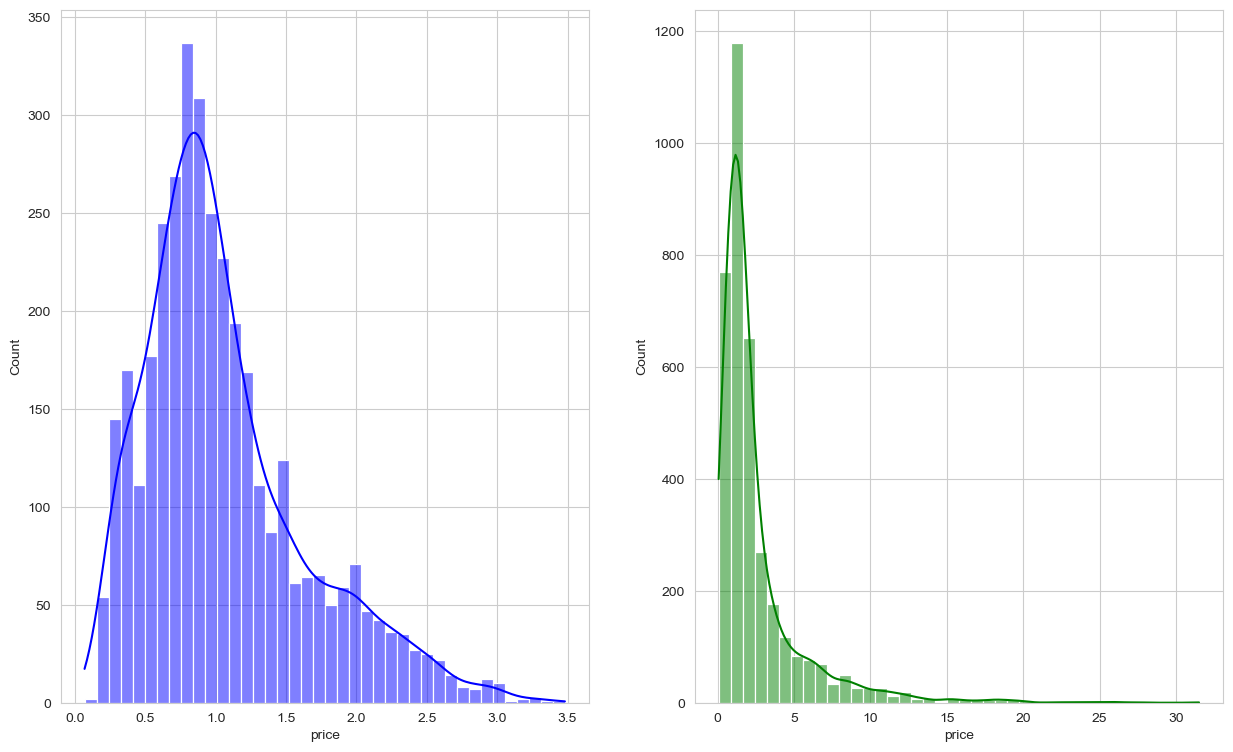

In [213]:
# LOG TRANSFORMATION 
plt.figure(figsize=(15, 9))
plt.subplot(1,2,1)
sns.histplot(np.log1p(df["price"]), kde = True, color= "Blue", bins= 40)
plt.subplot(1,2,2)
sns.histplot(df["price"], kde = True, color= "Green", bins = 40)

<Axes: >

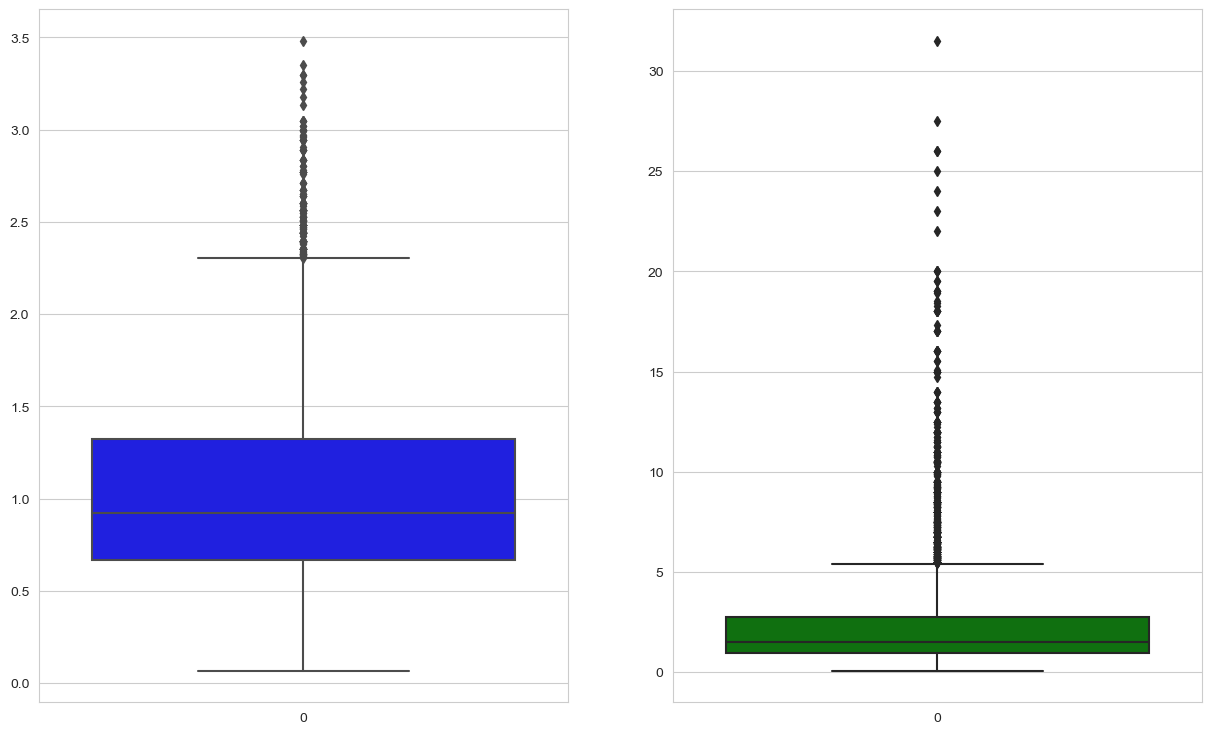

In [218]:
# LOG TRANSFORMATION 
plt.figure(figsize=(15, 9))
plt.subplot(1,2,1)
sns.boxplot(np.log1p(df["price"]), color= "Blue")
plt.subplot(1,2,2)
sns.boxplot(df["price"], color= "Green")

 AS OUR TARGET VARIABLE IS RIGHT SKEWED AND CONSIST OF SIGNIFICANT OUTLIERS WE CHOOSE TO PERFORM LOG TRANSFORMATION 
AND IN FUTURE WILL SEE THE POSSIBILITY TO APPLY LOG TRANSFORMATION BEFORE MODELLING 

In [ ]:
# Dealing with Price_per_sqft

In [219]:
df.head(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,price_bin
0,flat,tulip ivory,sector 70,5.0,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,...,NaN,4800.00,0,1,1,0,0,0,119,5-10
1,flat,signature global the millennia,sector 37d,0.6,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,3,...,NaN,596.12,0,0,0,0,0,0,35,0-1


In [222]:
df["Price_per_sqft"].isnull().sum()

18

In [223]:
df["Price_per_sqft"].describe()

count      3644.000000
mean      13886.441548
std       23255.174224
min           4.000000
25%        6812.750000
50%        9011.000000
75%       13852.000000
max      600000.000000
Name: Price_per_sqft, dtype: float64

<Axes: xlabel='Price_per_sqft', ylabel='Count'>

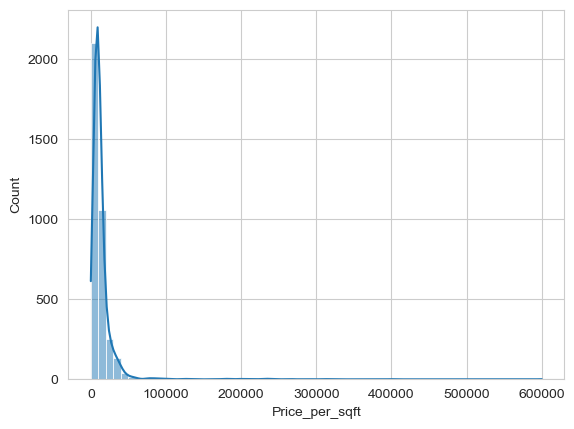

In [231]:
sns.histplot(df["Price_per_sqft"],kde = True,  bins = 60)

<Axes: >

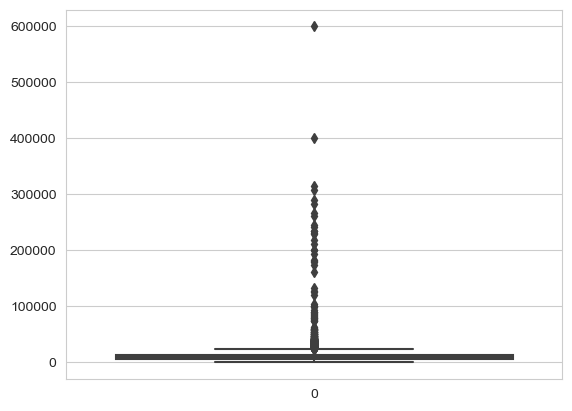

In [232]:
sns.boxplot(df["Price_per_sqft"])

In [ ]:
# SEVERAL OUTLIERS AND POTENTIALLY EFFECTS MODEL WILL PERFORM OUTLIER REMOVAL IN FUTURE AND IMPUTE FEW MISSING VALUES 

In [ ]:
#DEALING WITH BEDROOM

In [253]:
df["bedRoom"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3783    False
3784    False
3785    False
3786    False
3787     True
Name: bedRoom, Length: 3662, dtype: bool

<Axes: xlabel='bedRoom'>

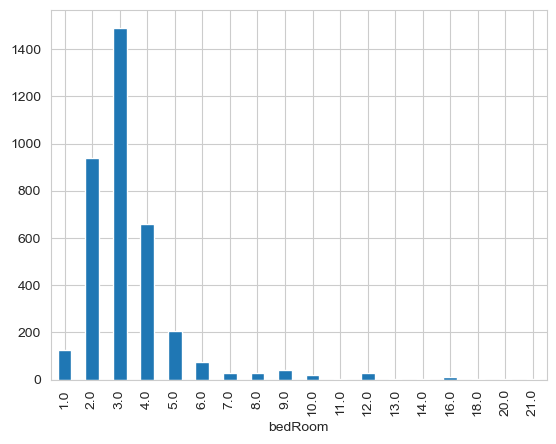

In [241]:
df["bedRoom"].value_counts().sort_index().plot(kind = "bar")

([<matplotlib.patches.Wedge at 0x1c282afe2d0>,
 [Text(0.315048144763578, 1.0539187191055237, '3.0'),
  Text(-1.0723155779487683, -0.24523315699227788, '2.0'),
  Text(0.026899548468383935, -1.0996710482195107, '4.0'),
  Text(0.7631654963146817, -0.7921984759104033, '5.0'),
  Text(0.95458838663326, -0.5465903512731541, '1.0'),
  Text(1.0329425686955156, -0.3781926093628884, '6.0'),
  Text(1.0647052463413427, -0.27641045279298154, '9.0'),
  Text(1.0793785948539538, -0.21199492675794027, '8.0'),
  Text(1.0885888538564368, -0.15803261454373763, '12.0'),
  Text(1.0949234957526148, -0.10555822302821084, '7.0'),
  Text(1.0983415061394401, -0.06038158569751518, '10.0'),
  Text(1.0995852982749263, -0.030202182332428728, '16.0'),
  Text(1.0998963196383587, -0.01510251786934343, '13.0'),
  Text(1.0999594994477244, -0.009439257105916005, '18.0'),
  Text(1.0999801546542274, -0.006607523504451824, '14.0'),
  Text(1.0999898747997965, -0.004719675616874338, '20.0'),
  Text(1.099996354916891, -0.0028318

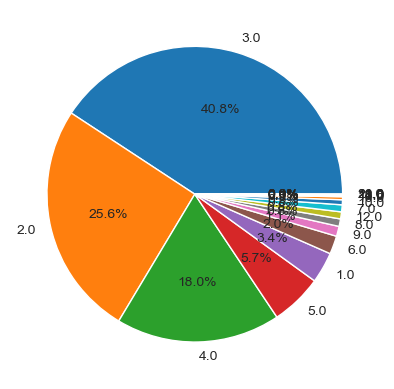

In [249]:
plt.pie(df["bedRoom"].value_counts().values, labels =df["bedRoom"].value_counts().index  ,autopct = '%1.1f%%' )

In [ ]:
#BATHROOM

In [259]:
df["bathroom"].isnull().sum()

1

<Axes: xlabel='bathroom'>

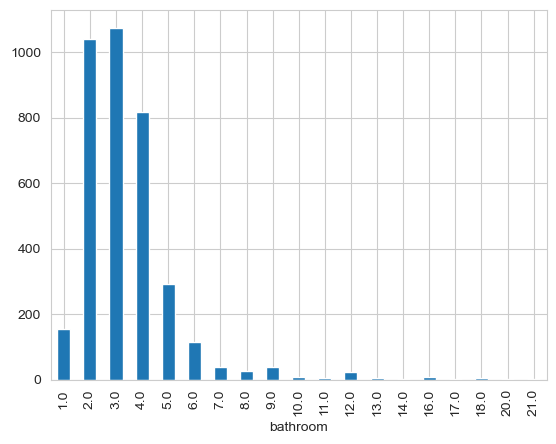

In [263]:
df["bathroom"].value_counts().sort_index().plot(kind= "bar")

In [ ]:
#BALCONY

<Axes: ylabel='count'>

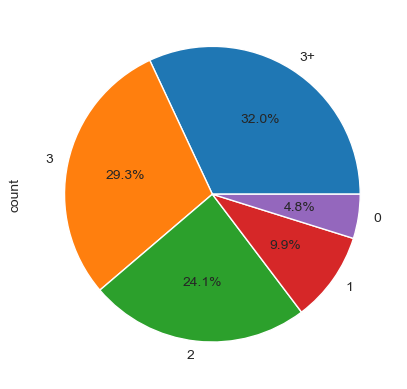

In [267]:
df["balcony"].value_counts().plot(kind= "pie", autopct = '%1.1f%%')

In [274]:
df.iloc[ : , 10: ]

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,price_bin
0,0.0,NaN,Relatively New,NaN,NaN,4800.00,0,1,1,0,0,0,119,5-10
1,7.0,NaN,New Property,650.0,NaN,596.12,0,0,0,0,0,0,35,0-1
2,11.0,NaN,New Property,NaN,NaN,2150.00,0,0,1,0,0,0,49,1-2
3,10.0,NaN,New Property,3395.0,NaN,1855.00,0,0,1,0,0,0,31,5-10
4,9.0,South-East,Moderately Old,2182.0,1750.75,1670.00,0,0,1,0,0,1,101,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,5.0,South,Relatively New,2025.0,NaN,NaN,0,0,1,0,1,1,167,1-2
3784,4.0,West,Relatively New,NaN,NaN,392.00,0,0,0,0,0,0,35,0-1
3785,19.0,North,Relatively New,1744.0,NaN,NaN,0,0,0,0,1,0,6,1-2
3786,0.0,West,Relatively New,1975.0,NaN,NaN,0,1,1,0,0,1,151,2-3


In [276]:
df["floorNum"].isnull().sum()

20

In [277]:
df["floorNum"].describe()

count    3642.000000
mean        6.816310
std         6.018558
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

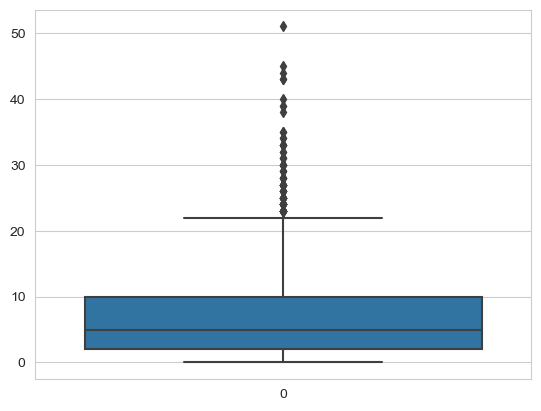

In [279]:
sns.boxplot(df["floorNum"])

#FEW MISSING VALUES IN FLOOR COLUMN, MOST OF THE HOUSES ARE ON LOWER FLOORS WITH 2,3 BEING ON TOP, SIGNIFICANT OUTLIERS ARE FOUND, IQR IS BETWEEN 2 AND 10

<Axes: xlabel='floorNum'>

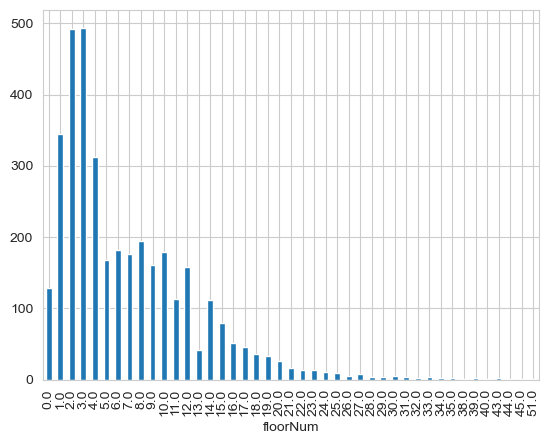

In [285]:
df["floorNum"].value_counts().sort_index().plot(kind = "bar")

In [286]:
df["facing"].isnull().sum()

1038

In [287]:
df["facing"].value_counts()

facing
North-East    623
East          621
North         385
West          249
South         231
North-West    191
South-East    172
South-West    152
Name: count, dtype: int64

In [ ]:
#DEALING WITH AGEPOSSESION

In [288]:
df["agePossession"].value_counts()

agePossession
Relatively New        1641
New Property           592
Moderately Old         561
Undefined              304
Old Property           298
Under Construction     266
Name: count, dtype: int64

In [289]:
df["agePossession"].isnull().sum()

0

 Market Distribution:

1. The majority of properties are categorized as "Relatively New" (1641 properties) and "New Property" (592 properties), indicating a robust market for newer developments.
Potential Concern:

2. There are 304 properties categorized as "Undefined", which lack clear age or status information. These properties may require further investigation to understand their characteristics and potential market implications.
Investment Opportunities:

3. Properties categorized as "Old Property" (298 properties) and "Moderately Old" (561 properties) may present opportunities for renovation or redevelopment, potentially appealing to investors looking for value-added opportunities.

In [293]:
pd.set_option("display.max_columns", None)
df.head(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,price_bin
0,flat,tulip ivory,sector 70,5.0,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,0.0,NaN,Relatively New,NaN,NaN,4800.00,0,1,1,0,0,0,119,5-10
1,flat,signature global the millennia,sector 37d,0.6,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,3,7.0,NaN,New Property,650.0,NaN,596.12,0,0,0,0,0,0,35,0-1


In [ ]:
#DEALING WITH SUPER_BUILT_UP_AREA

In [295]:
df["super_built_up_area"].isnull().sum()

1787

In [296]:
df["super_built_up_area"].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

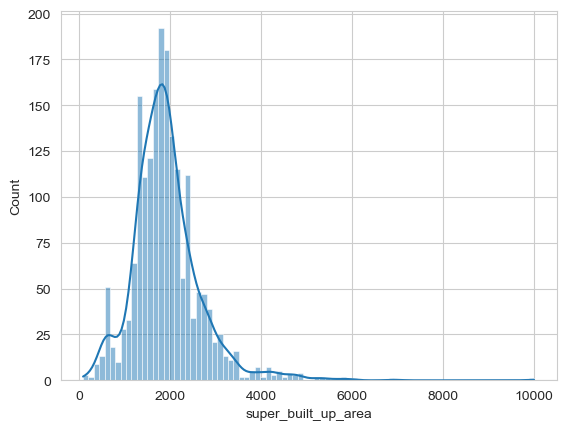

In [301]:
sns.histplot(df["super_built_up_area"].dropna(), kde = True)

<Axes: >

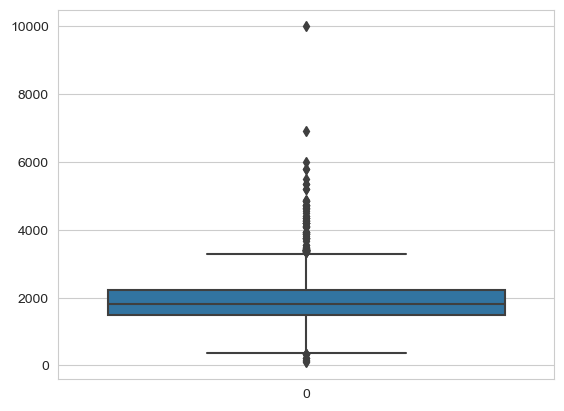

In [307]:
sns.boxplot(df["super_built_up_area"])

1. Data Availability: 1875 non-null values out of 3662 total entries; 1787 missing values in super_built_up_area.

2. Distribution: Mean area is 1925.24 sq. units with a standard deviation of 764.17; median is 1828.0 sq. units, indicating a right-skewed distribution.

3. Outliers: Identified outliers beyond 0 to 3849.75 sq. units; maximum value is 10000 sq. units, suggesting extreme outliers.

4. Recommendations: Address missing values; investigate and handle extreme outliers to ensure data quality.

5. Next Steps: Impute missing data, manage outliers, proceed with analysis using a cleaned dataset for accurate insights.



In [ ]:
#BUILT_UP_AREA

In [308]:
df["built_up_area"].isnull().sum()


1986

In [309]:
df["built_up_area"].describe()

count      1676.000000
mean       2381.597273
std       18016.321949
min           2.000000
25%        1102.250000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

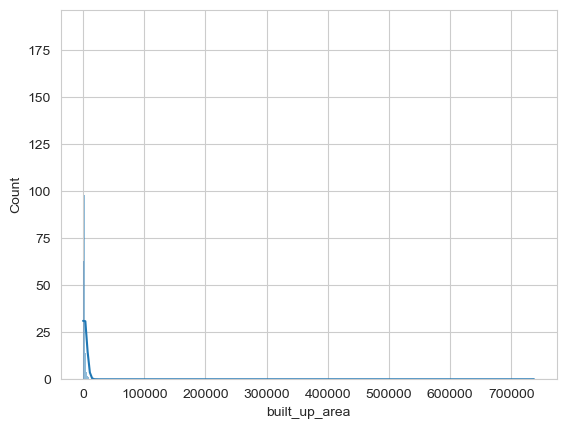

In [311]:
sns.histplot(df["built_up_area"].dropna(), kde = True)

<Axes: >

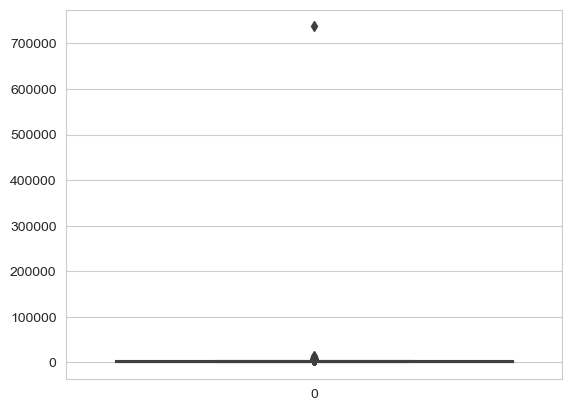

In [310]:
sns.boxplot(df["built_up_area"])

In [ ]:
#EXTENSIVE WORK TO BE DONE AS 50% DATA IS MISSING 

In [312]:
df["carpet_area"].isnull().sum()

1793

In [313]:
df["carpet_area"].describe()

count      1869.000000
mean       2531.901572
std       22818.024381
min          15.000000
25%         845.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

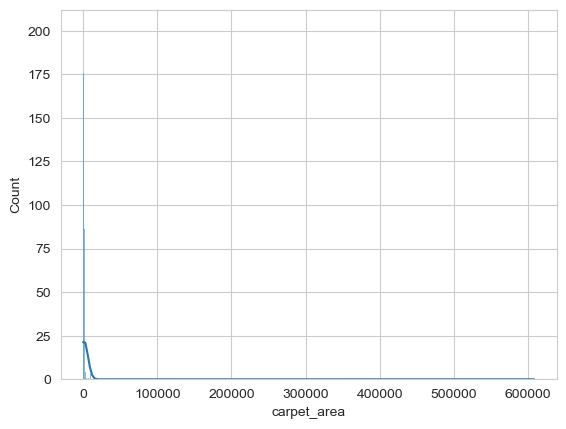

In [315]:
sns.histplot(df["carpet_area"].dropna(), kde = True)

In [320]:
df.drop(columns = ["price_bin"], inplace = True)
df.iloc[:,16:]

,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,0,1,1,0,0,0,119
1,0,0,0,0,0,0,35
2,0,0,1,0,0,0,49
3,0,0,1,0,0,0,31
4,0,0,1,0,0,1,101
5,0,0,0,0,1,1,49
6,0,0,0,0,0,0,0
7,0,0,0,0,0,1,113
8,0,0,0,0,0,1,44
9,0,1,0,0,0,0,76


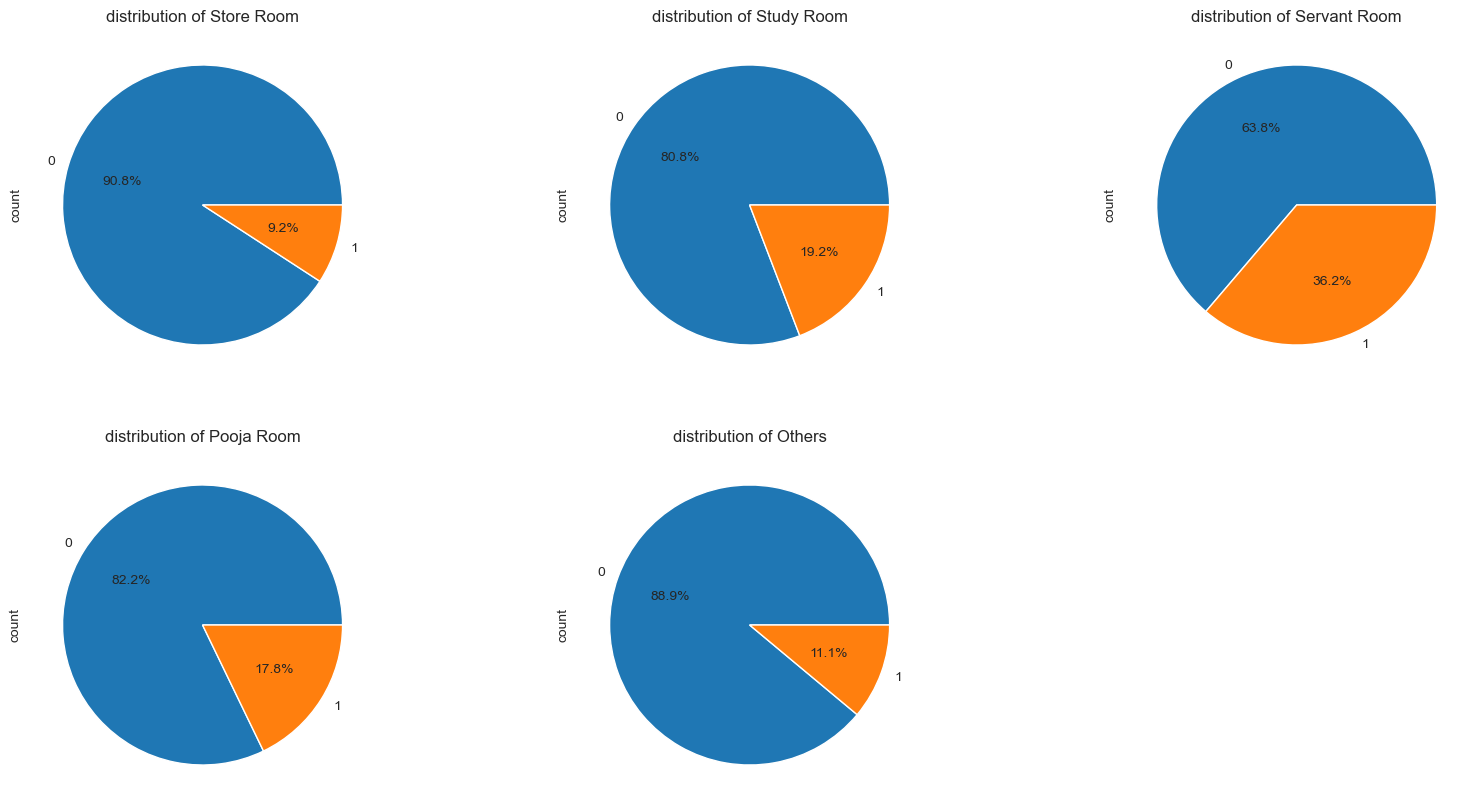

In [329]:
plt.figure(figsize= (20,10))
for idx, room in enumerate(["store room", "study room", "servant room", "pooja room", "others"], 1):
    ax= plt.subplot(2,3,idx)
    df[room].value_counts().plot(kind = "pie", autopct = '%1.1f%%')
    plt.title(f'distribution of {room.title()}')
    



In [330]:
df["furnishing_type"].isnull().sum()

0

In [331]:
df["furnishing_type"].value_counts()

furnishing_type
0    2410
1    1046
2     206
Name: count, dtype: int64

<Axes: ylabel='count'>

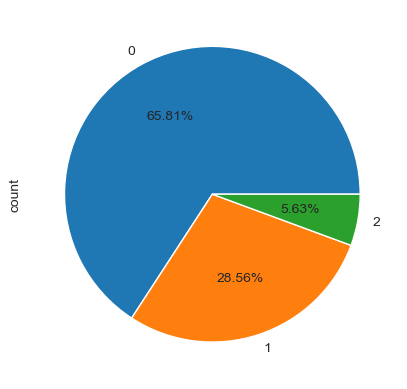

In [334]:
df["furnishing_type"].value_counts().plot(kind = "pie", autopct = "%0.2f%%")

In [ ]:
# DEALING WITH LUXURY SCORE 

In [335]:
df["luxury_score"].isnull().sum()

0

<Axes: xlabel='luxury_score', ylabel='Count'>

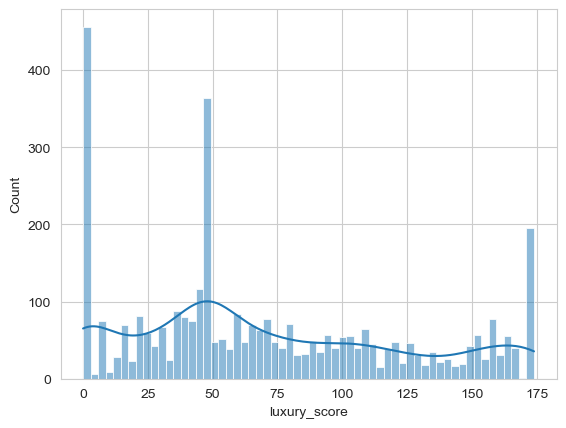

In [339]:
sns.histplot(df["luxury_score"], bins = 60, kde = True)

In [340]:
df["luxury_score"].describe()

count    3662.000000
mean       71.716821
std        53.046323
min         0.000000
25%        31.250000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: >

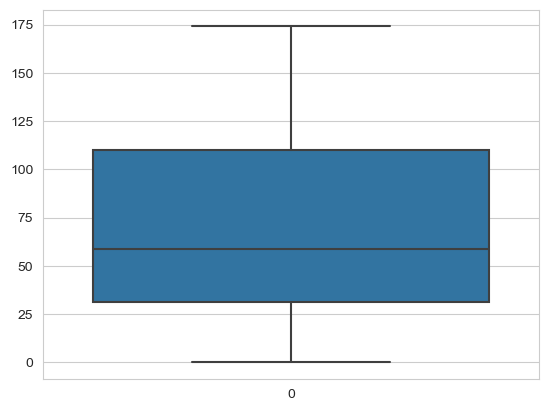

In [341]:
sns.boxplot(df["luxury_score"])

In [ ]:
1. No outlier in luxury score  and no null values most of the values range from 31 to 110  luxury score 
2. The distribution is showing a multimodal distribution pattern 
